# 

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [368]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

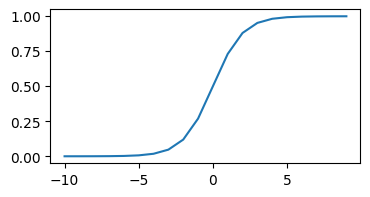

In [369]:
x = np.arange(-10, 10)
plt.figure(figsize=(4,2))
plt.plot(x,sigmoid(x))
plt.show()

In [370]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [371]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA/ML Practical/Day_2/Social_Network_ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [372]:
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0
...,...,...,...
279,46,41000,1
280,51,23000,1
281,50,20000,1
282,36,33000,0


In [373]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [374]:
#To check correlation between x as Nominal and y as numeric
#use the  ANOVA test

In [375]:
from scipy.stats import f_oneway
#performing the ANOVA test (analysis of variance)
#Null hypothesis (HO) = there is no correlation between Nominal and continuous variable
#We accept the Assumption(HO) only when P-value > 0.05 else reject

In [376]:
sal_grp= df.groupby('Purchased')['Salary']
f_oneway(*sal_grp.apply(list))

F_onewayResult(statistic=36.939424499417434, pvalue=3.942978907274541e-09)

In [377]:
age_grp= df.groupby('Purchased')['Age']
f_oneway(*age_grp.apply(list))

F_onewayResult(statistic=133.36478028660568, pvalue=1.6087546838045986e-25)

In [378]:
X = df[['Age','Salary']].values
X.shape

(284, 2)

In [379]:
y = df['Purchased'].values
y.shape

(284,)

In [380]:
from sklearn.preprocessing import StandardScaler
#std score of sample x is calculates as:
# z= (x-u)/s
#u is mean, s is standard deviation

In [381]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [382]:
X_sc[:5,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [383]:
sc.inverse_transform(X_sc[0:1,:]) #inverse Transform

array([[   19., 19000.]])

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
X_train,X_test,y_train,y_test = train_test_split(X_sc,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [387]:
from sklearn.linear_model import LinearRegression
model = LogisticRegression(solver ='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [388]:
yhat = model.predict(X_test)
yhat.shape

(57,)

In [389]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [390]:
accuracy_score(y_test,yhat)

0.7894736842105263

In [391]:
print(confusion_matrix(y_test,yhat))

[[20  5]
 [ 7 25]]


In [392]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.83      0.78      0.81        32

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



In [393]:
!pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable


In [394]:
import seaborn as sns

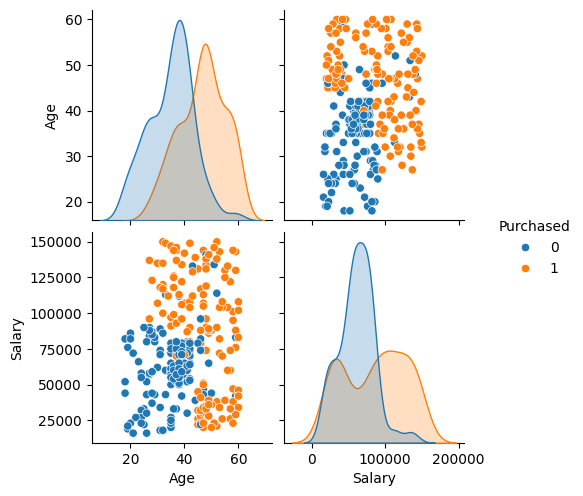

In [395]:
sns.pairplot(df, hue='Purchased');

In [396]:
yhat #by using threshold as 0.5

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [397]:
yprob = model.predict_proba(X_test) #cheking probability to predict 0 or 1 

In [398]:
yprob

array([[0.76103229, 0.23896771],
       [0.63926622, 0.36073378],
       [0.33604581, 0.66395419],
       [0.72174241, 0.27825759],
       [0.0894652 , 0.9105348 ],
       [0.10140968, 0.89859032],
       [0.50163361, 0.49836639],
       [0.77001015, 0.22998985],
       [0.63719268, 0.36280732],
       [0.14412219, 0.85587781],
       [0.08497352, 0.91502648],
       [0.46928653, 0.53071347],
       [0.73990484, 0.26009516],
       [0.58201334, 0.41798666],
       [0.02181898, 0.97818102],
       [0.0834894 , 0.9165106 ],
       [0.58201334, 0.41798666],
       [0.27140339, 0.72859661],
       [0.00528178, 0.99471822],
       [0.13148069, 0.86851931],
       [0.69959663, 0.30040337],
       [0.12488833, 0.87511167],
       [0.82870675, 0.17129325],
       [0.0290156 , 0.9709844 ],
       [0.49554104, 0.50445896],
       [0.33176648, 0.66823352],
       [0.01055614, 0.98944386],
       [0.98794325, 0.01205675],
       [0.92556765, 0.07443235],
       [0.04119046, 0.95880954],
       [0.

In [399]:
ans50 =np.array(list(map( lambda r: 1 if r[1]>0.5 else 0, yprob)))
ans50

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [400]:
sum(ans50-yhat)

0

In [401]:
#for threshold =0.3
yhat_point3 =np.array(list(map( lambda r: 1 if r[1]>0.3 else 0, yprob)))
yhat_point3

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [402]:
print(confusion_matrix(y_test,yhat_point3))

[[12 13]
 [ 1 31]]


In [403]:
#predict for
#Age=42. salary= 125000
#Age=25. salary= 60000

In [404]:
test_val = np.array([[42,125000],[25,60000]]).reshape(-1,2)

model.predict(sc.transform(test_val))

array([1, 0], dtype=int64)

In [405]:
#conture

In [406]:
x = np.arange(-3,3,0.05)
y = np.arange(-3,3,0.05)
X , Y = np.meshgrid(x,y)
Z1 = np.exp(-X**2-Y**2)
Z2 = np.exp(-(X-1)**2-(Y-1)**2)
Z = (Z1-Z2)*2

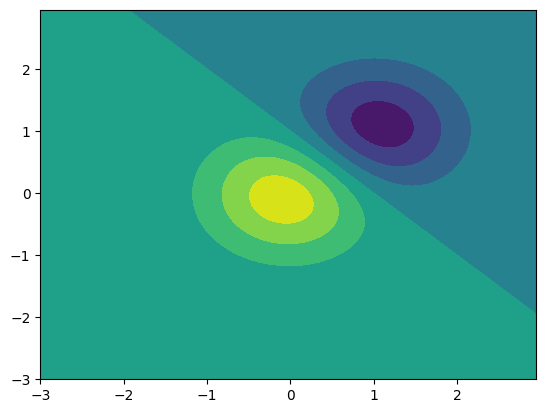

In [407]:
plt.contourf(X,Y,Z)
plt.show()

In [408]:
age = np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)
Age , Sal  = np.meshgrid(age, sal)
print(Age.shape, Sal.shape)

(408, 424) (408, 424)


In [409]:
formed_data = np.c_[Age.ravel(),Sal.ravel()]

In [410]:
Z1 = model.predict(formed_data).reshape(Age.shape) 

In [411]:
Z1.shape

(408, 424)

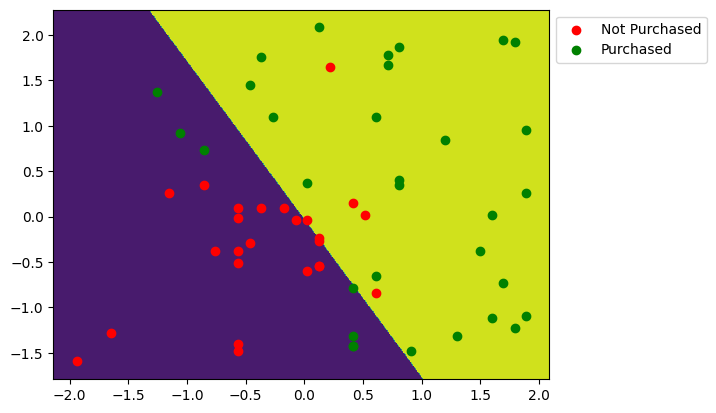

In [413]:
plt.contourf(Age, Sal, Z1)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c = 'r', label ="Not Purchased")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c = 'Green', label ="Purchased")
plt.legend(bbox_to_anchor=(1,1))
plt.show()